In [15]:
import pandas as pd
from constants import *
import seaborn as sns

In [30]:
arbor_stats_df = pd.read_csv('%s/arbor_stats.csv' % STATISTICS_DIR, skipinitialspace=True)
arbor_stats_df

,arbor name,pareto front distance,pareto front location
0,087_1_C_day4,1.279848,1.00
1,084_2_C_day2,0.213441,1.00
2,093_1_C_day2,0.447800,1.00
3,078_1_C_day4,0.161652,0.61
4,089_3_S_day4,1.013235,0.70
...,...,...,...
4214,065_3_C_day2,0.125012,0.11
4215,008_4_S_day5,2.675748,0.86
4216,030_3_C_day2,0.399638,0.26
4217,028_4_C_day3,0.391430,0.86


In [38]:
arbor_sizes_df = pd.read_csv('%s/arbor_sizes.csv' % STATISTICS_DIR, skipinitialspace=True)
for col in ['convex hull volume', 'total lateral length', 'exploration factor']:
    arbor_sizes_df[col] /= arbor_sizes_df['lateral roots']
arbor_sizes_df

,arbor name,lateral roots,convex hull volume,total lateral length,exploration factor
0,087_1_C_day4,15,1.034302,1.583117,1.246367
1,084_2_C_day2,3,0.545973,0.151319,0.138727
2,093_1_C_day2,8,0.218262,0.079677,0.044284
3,078_1_C_day4,4,0.608648,0.483667,0.352413
4,089_3_S_day4,8,0.960896,0.780854,1.805078
...,...,...,...,...,...
4133,065_3_C_day2,2,0.914060,0.362314,0.287113
4134,008_4_S_day5,20,0.825239,1.287000,1.380094
4135,030_3_C_day2,4,0.180690,0.560306,0.380615
4136,028_4_C_day3,8,0.678473,0.244582,0.317918


In [39]:
scaling_df = pd.read_csv('%s/scaling_distances.csv' % STATISTICS_DIR, skipinitialspace=True)
scaling_df

,arbor name,pareto front scaling distance,pareto front scaling location
0,087_1_C_day4,1.072667,0.83
1,084_2_C_day2,1.036260,0.95
2,093_1_C_day2,1.057325,0.70
3,078_1_C_day4,1.024057,0.61
4,089_3_S_day4,1.041909,0.48
...,...,...,...
4214,065_3_C_day2,1.031211,0.35
4215,008_4_S_day5,1.043725,0.57
4216,030_3_C_day2,1.067804,0.30
4217,028_4_C_day3,1.025459,0.69


In [51]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition
0,PimpiBig4,103_4_S_day5,5,297,103,4,S
1,PimpiBig4,031_3_S_day5,5,278,31,3,S
2,PimpiBig4,055_2_S_day5,5,151,55,2,S
3,PimpiBig4,098_1_S_day5,5,14,98,1,S
4,PimpiBig4,101_1_S_day5,5,106,101,1,S
...,...,...,...,...,...,...,...
5554,PimpiBig2,139_1_C_day2,2,15,139,1,C
5555,PimpiBig2,172_3_C_day2,2,150,172,3,C
5556,PimpiBig2,166_2_S_day3,3,126,166,2,S
5557,PimpiBig2,060_2_C_day1,1,42,60,2,C


In [69]:
df = pd.merge(arbor_stats_df, arbor_sizes_df, on='arbor name')
df = pd.merge(df, scaling_df, on='arbor name')
df = pd.merge(df, metadata_df, on='arbor name')
df = df[df['day'] > 4]
df

,arbor name,pareto front distance,pareto front location,lateral roots,convex hull volume,total lateral length,exploration factor,pareto front scaling distance,pareto front scaling location,experiment,day,Picture #,genotype,replicate,condition
6,091_4_S_day5,0.424164,0.31,3,5.447957,9.358389,4.308413,1.024642,0.34,PimpiBig3,5,54,91,4,S
14,220_1_C_day5,1.815774,0.40,13,0.817663,1.601864,1.440102,1.058105,0.43,PimpiBig1,5,60,220,1,C
18,237_2_C_day5,2.376004,0.96,21,0.721645,2.495460,1.719315,1.057457,0.68,PimpiBig3,5,290,237,2,C
21,262_2_C_day5,4.418409,0.28,27,0.835505,1.729110,1.204879,1.046320,0.28,PimpiBig2,5,30,262,2,C
24,256_2_S_day5,1.830507,0.11,8,0.452795,2.066607,0.392197,1.098449,0.13,PimpiBig2,5,118,256,2,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,230_2_S_day5,2.149698,0.36,18,0.771593,1.307936,1.599479,1.025538,0.32,PimpiBig3,5,10,230,2,S
4517,251_2_C_day5,1.440228,0.60,19,1.502795,2.187835,1.694992,1.022803,0.55,PimpiBig2,5,113,251,2,C
4521,213_1_C_day5,2.896617,0.80,16,0.821553,1.911859,1.643681,1.088203,0.62,PimpiBig1,5,198,213,1,C
4524,248_3_S_day5,1.531458,0.28,7,1.047782,2.406456,0.760466,1.060200,0.31,PimpiBig3,5,8,248,3,S


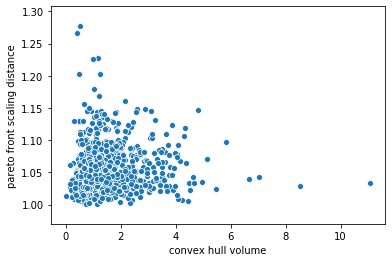

In [70]:
sns.scatterplot(x='convex hull volume', y='pareto front scaling distance', data=df)

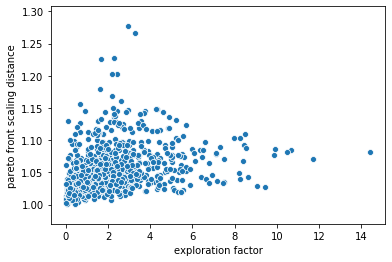

In [71]:
sns.scatterplot(x='exploration factor', y='pareto front scaling distance', data=df)

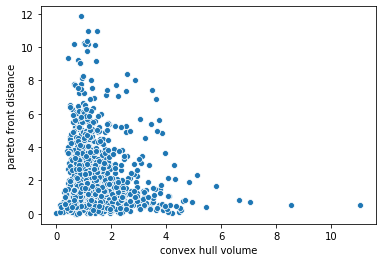

In [72]:
sns.scatterplot(x='convex hull volume', y='pareto front distance', data=df)

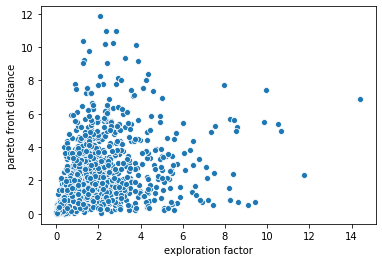

In [73]:
sns.scatterplot(x='exploration factor', y='pareto front distance', data=df)

In [74]:
from scipy.stats import pearsonr, spearmanr
from itertools import product

for dist_col, size_col in product(['pareto front distance', 'pareto front scaling distance'],
                                  ['convex hull volume', 'exploration factor']):
    corr, pval = pearsonr(df[dist_col], df[size_col])
    print(dist_col, size_col, corr)

pareto front distance convex hull volume -0.12578602656337007
pareto front distance exploration factor 0.27633006914418734
pareto front scaling distance convex hull volume 0.10307904149298464
pareto front scaling distance exploration factor 0.321619527525785
